Ivanna Herrera Ibarra 744614                                                                                            
02/10/23
# Tarea 7 - Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
$$\int_{1}^{3} e^{x}\log(x)\text{d}x$$

$$\int_1^3 \sin(x)\ln(x) \text{d}x$$

In [62]:
import numpy as np
import pandas as pd

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=["Aproximación 1", "Error 1", "Aproximación 2", "Error 2"], index=N)

def f(x) :
  return np.exp(x) * np.log10(x)

a = 1
b = 3

def montecarlo1(f, N, a, b) :
  u = np.random.uniform(a, b, N)
  media = np.mean(f(u))
  return media*(b-a)

for i in N :
  aproximacion = montecarlo1(f, int(i), 1, 3)
  table.loc[i, "Aproximación 1"] = aproximacion
  table.loc[i, "Error 1"] = abs(6.09207 - aproximacion)

def g(x) :
  return np.sin(x) * np.log(x)

a = 1
b = 3

def montecarlo2(g, N, a, b) :
  u = np.random.uniform(a, b, N)
  media = np.mean(g(u))
  return media*(b-a)

for i in N :
  aproximacion = montecarlo2(g, int(i), 1, 3)
  table.loc[i, "Aproximación 2"] = aproximacion
  table.loc[i, "Error 2"] = abs(0.869844 - aproximacion)

table

,Aproximación 1,Error 1,Aproximación 2,Error 2
10.0,6.185516,0.093446,0.847552,0.022292
100.0,5.74159,0.35048,0.889681,0.019837
1000.0,6.155012,0.062942,0.847843,0.022001
10000.0,6.121137,0.029067,0.872904,0.00306
100000.0,6.094855,0.002785,0.869761,0.000083


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [115]:
import pandas as pd

N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error relativo"], index=N)

def area(x, y) :
  return (((x)**2) + (2*(y)**2)) <= ((-2*x) + (8*y) - (7))

def montecarlo2(region, xa, xb, ya, yb, N) :
  x = np.random.uniform(xa, xb, N)
  y = np.random.uniform(ya, yb, N)
  B = region(x, y)
  AR = (xb - xa) * (yb - ya)
  return np.mean(B) * AR

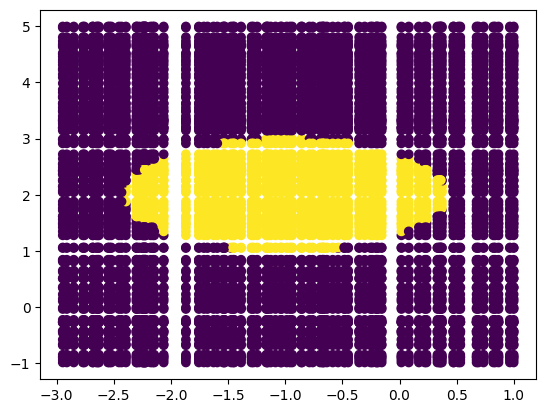

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-3, 1, 100)
y = np.random.uniform(-1, 5, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=area(X, Y))

In [117]:
for i in N :
  AD = montecarlo2(area, -2.5, 0.5, 1, 3, int(i))
  AR = (0.5 - (-2.5))*(3 - 1)
  C_rel = ((1 - (AD / AR)) / (AD / AR))**(1/2)
  error = np.log10(C_rel) - (1/2)*np.log10(int(i))
  table.loc[i, "Aproximación"] = AD
  table.loc[i, "Error relativo"] = error

table

,Aproximación,Error relativo
10.0,4.2,-0.683988
100.0,4.68,-1.274836
1000.0,4.428,-1.724878
10000.0,4.4256,-2.224429
100000.0,4.44744,-2.728531


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Es utilizado para valuar instrumentos financieros que tienen rendimientos aleatorios, ya que dependen del comportamiento de acciones o bienes. Algunos ejemplos son los instrumentos de renta variable, inversiones en bolsa, etc. En ésta última nos ayuda a conocer hasta donde puede caer nuestra inversión inicial y también a predecir en que momento puede subir o bajar.

Es utilizado en las empresas para calcular su valor, para evaluar las inversiones en proyectos, o para evaluar los derivados financieros. Ayuda bastante a las empresas ya que se dan estimaciones de lo mejor y peor que podría pasar en los proyectos que se quieran crear, para que así se pueda tomar una buena decisión sobre si es conveniente o no empezar el proyecto.

Es utilizado para evaluar portafolios, predecir el precio de las acciones y estimar el valor del riesgo. Nos ayuda a medir el riesgo del crédito de un portafolio, ya que estima la distribución de pérdidas. Nos ayuda a predecir el precio de las acciones, ya que se analizan datos pasados y predice resultados.

### Referencias

http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf
https://www.zonaeconomica.com/metodo-monte-carlo
https://www.repositoriodigital.ipn.mx/bitstream/123456789/5944/1/GONZALEZ%20JUAREZ%20KARLA%20Tesis%202008.pdf
https://www.banxico.org.mx/publicaciones-y-prensa/reportes-sobre-el-sistema-financiero/recuadros/%7BE165B93E-88FF-4195-B476-0FF711A6BC78%7D.pdf
https://www.redalyc.org/pdf/5718/571863990005.pdf
